#** 📊2025-1 DScover 가이드 프로젝트**

### 🏠허위매물 탐지 해커톤 -부동산 ver.

- 가이드 코드에는 이상치 처리, 수치형 변수 정규화/표준화, 하이퍼파라미터 튜닝, feature selection 등이 생략되어 있습니다. 해당 부분들 중 필요하다고 생각하는 부분을 직접 수행해보세요

- 가이드 코드는 어디까지나 참고용입니다. 꼭 가이드 코드대로 프로젝트를 수행할 필요는 없으니 팀별로 자유롭게 프로젝트를 진행해주세요 :)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/colab_data/Dscover 25-1 가이드 프로젝트/train.csv')
test = pd.read_csv('/content/drive/MyDrive/colab_data/Dscover 25-1 가이드 프로젝트/test.csv')

## 데이터 확인

In [ ]:
train.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


## 결측값 확인

In [ ]:
!pip install missingno

In [ ]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

In [ ]:
# 각 행별 결측치 개수 계산
missing_counts = train.isna().sum(axis=1)

# 결측치가 3개인 행 필터링
missing_rows = train[missing_counts == 6]

# 결과 출력
missing_rows


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
37,TRAIN_0037,현장확인,25000000.0,520000,NaN,NaN,NaN,동향,NaN,NaN,불가능,NaN,4,k74XT0T1B8,D플랫폼,2024-10-06,0
76,TRAIN_0076,전화확인,81000000.0,70000,NaN,NaN,NaN,남향,NaN,NaN,불가능,NaN,0,K48zc2G4K8,D플랫폼,2025-01-04,0
88,TRAIN_0088,현장확인,151000000.0,50000,NaN,NaN,NaN,서향,NaN,NaN,불가능,NaN,0,M02bn7Y4P0,D플랫폼,2025-01-16,0
339,TRAIN_0339,서류확인,194000000.0,360000,NaN,NaN,NaN,남향,NaN,NaN,불가능,NaN,0,M02bn7Y4P0,D플랫폼,2025-01-13,0
515,TRAIN_0515,전화확인,189500000.0,500000,NaN,NaN,NaN,북서향,NaN,NaN,불가능,NaN,0,M02bn7Y4P0,D플랫폼,2024-07-25,0
546,TRAIN_0546,서류확인,116000000.0,180000,NaN,NaN,NaN,남동향,NaN,NaN,불가능,NaN,9,o07ZC4L7V4,C플랫폼,2024-11-07,0
686,TRAIN_0686,현장확인,181500000.0,520000,NaN,NaN,NaN,서향,NaN,NaN,불가능,NaN,0,M02bn7Y4P0,D플랫폼,2024-08-15,0
952,TRAIN_0952,서류확인,350000000.0,700000,NaN,NaN,NaN,남향,NaN,NaN,불가능,NaN,0,K48zc2G4K8,D플랫폼,2024-07-03,1
1664,TRAIN_1664,서류확인,367500000.0,90000,NaN,NaN,NaN,북향,NaN,NaN,불가능,NaN,14,K48zc2G4K8,D플랫폼,2024-03-28,1
2071,TRAIN_2071,현장확인,402500000.0,310000,NaN,NaN,NaN,서향,NaN,NaN,불가능,NaN,13,M02bn7Y4P0,D플랫폼,2023-08-31,1


<Figure size 800x500 with 0 Axes>

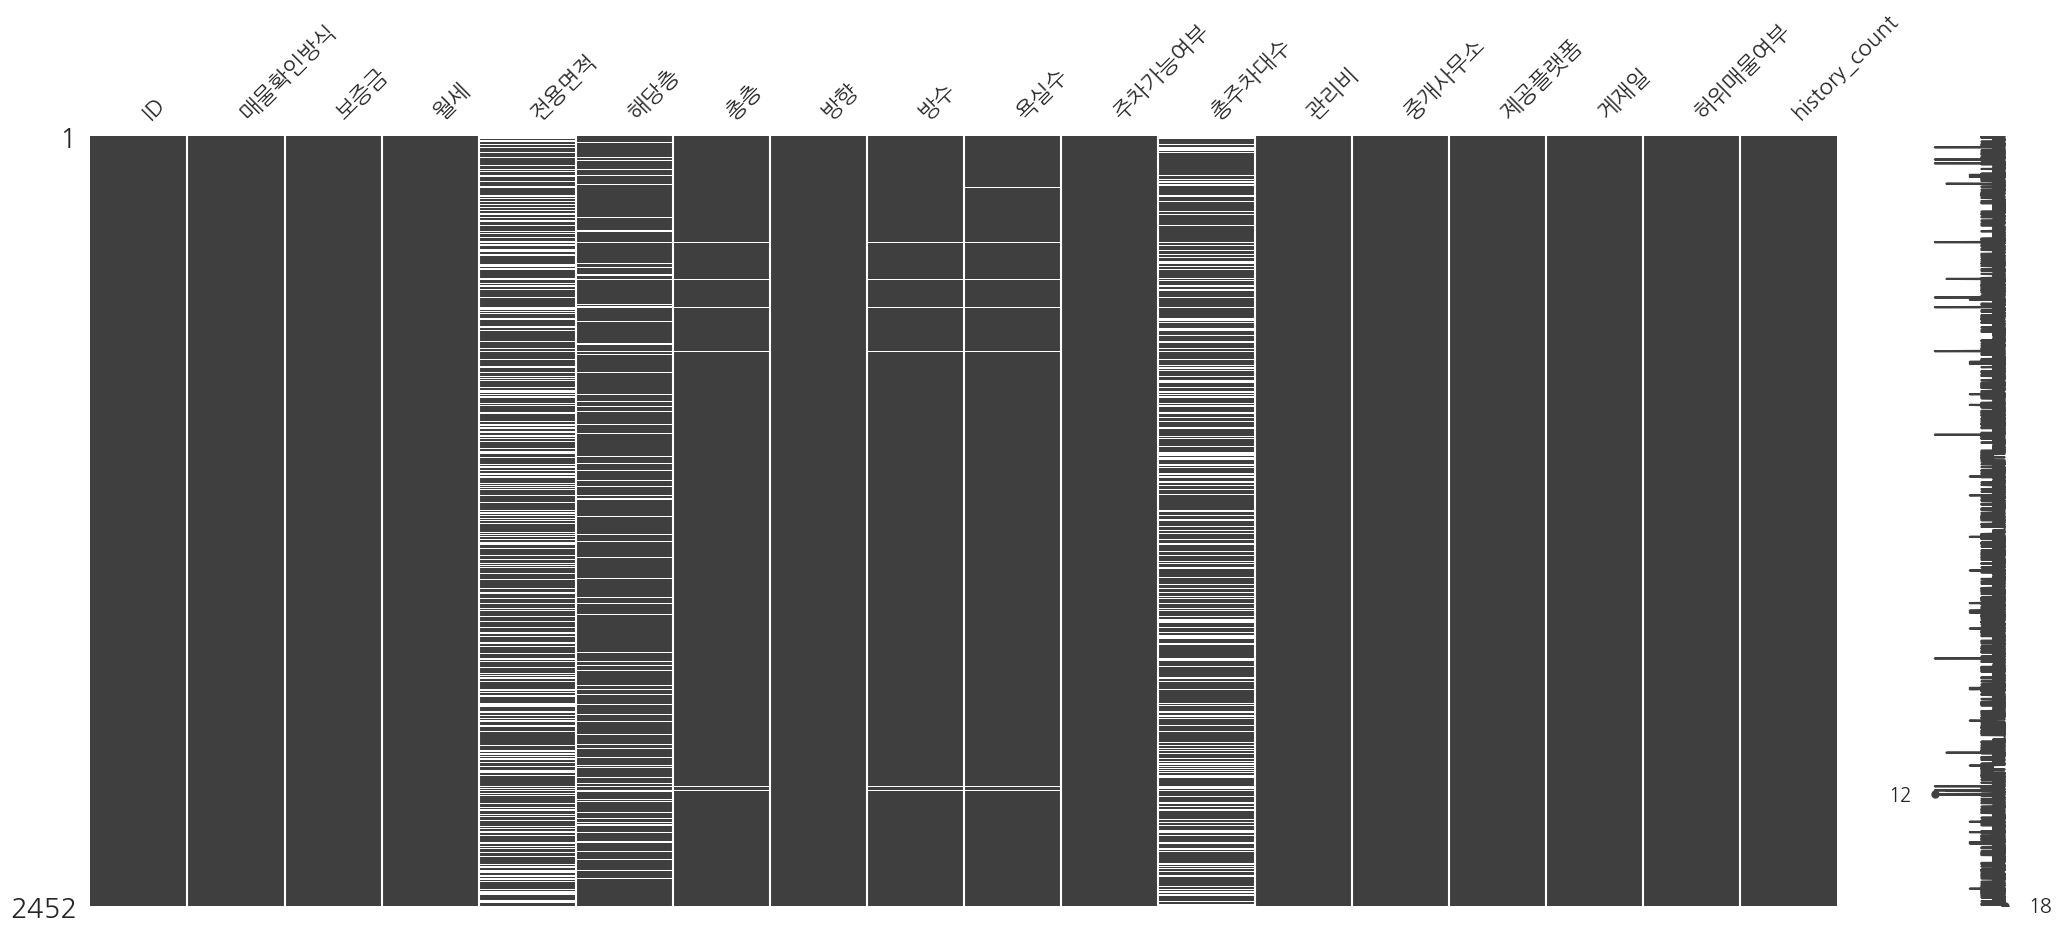

In [ ]:
import missingno as ms
plt.figure(figsize=(8, 5))
ms.matrix(train)
plt.show()

<Figure size 800x500 with 0 Axes>

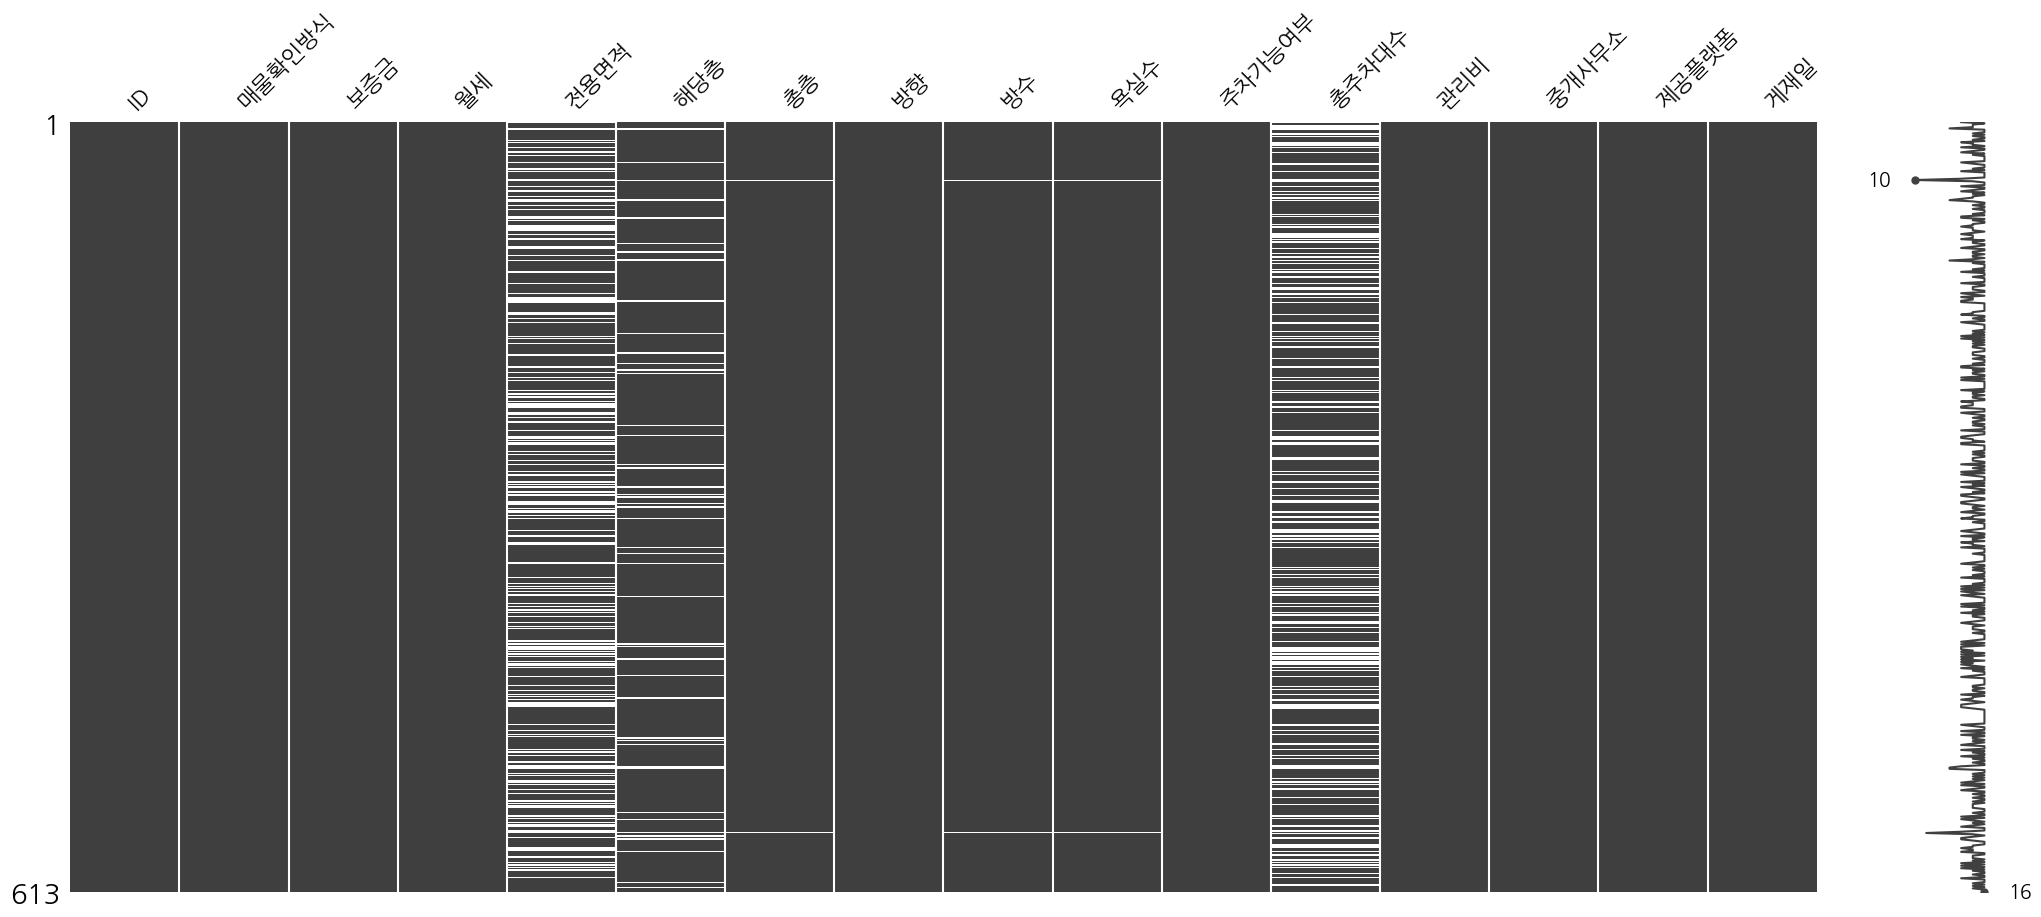

In [ ]:
plt.figure(figsize=(8, 5))
ms.matrix(test)
plt.show()

In [ ]:
train['결측여부'] = train.isna().any(axis=1).map({True: '결측 있음', False: '결측 없음'})

missing_ratio = train.groupby(['결측여부', '허위매물여부']).size().reset_index(name='count')
missing_ratio['비율'] = missing_ratio.groupby('결측여부')['count'].transform(lambda x: x / x.sum())

fig = px.bar(missing_ratio,
             x='결측여부',
             y='비율',
             color='허위매물여부',
             text=missing_ratio['비율'].map(lambda x: f"{x:.1%}"),
             barmode='group',
             title="전체 데이터에서 결측 여부에 따른 허위매물 비율",
             labels={'비율': '비율', '결측여부': '결측 여부', '허위매물여부': '허위매물 여부'})

fig.show()

In [ ]:
missing_columns = train.isna().sum()
missing_columns = missing_columns[missing_columns > 0].index  # 결측값이 1개 이상 있는 컬럼만 선택

# 결과를 저장할 리스트
plot_data = []

# 각 컬럼별로 결측 여부에 따른 허위매물 비율 계산
for col in missing_columns:
    train['결측여부'] = train[col].isna().map({True: '결측 있음', False: '결측 없음'})

    # 그룹별 허위매물여부(0,1) 비율 계산
    missing_ratio = train.groupby(['결측여부', '허위매물여부']).size().reset_index(name='count')
    missing_ratio['비율'] = missing_ratio.groupby('결측여부')['count'].transform(lambda x: x / x.sum())
    missing_ratio['컬럼'] = col  # 현재 컬럼명 추가
    plot_data.append(missing_ratio)

plot_df = pd.concat(plot_data, ignore_index=True)

fig = px.bar(plot_df,
             x='컬럼',
             y='비율',
             color='허위매물여부',
             text=plot_df['비율'].map(lambda x: f"{x:.1%}"),  # 비율을 퍼센트로 표시
             barmode='group',
             title="각 컬럼별 결측 여부에 따른 허위매물 비율",
             labels={'비율': '비율', '컬럼': '컬럼명', '허위매물여부': '허위매물 여부'},
             facet_col='결측여부',
             category_orders={'결측여부': ['결측 있음', '결측 없음']})  # 결측 여부 순서 지정

fig.update_layout(
    height=600,
    width=1000,
    showlegend=True
)

fig.show()

In [ ]:
train['결측_개수'] = train.isna().sum(axis=1)

# 그룹별 허위매물여부(0,1) 비율 계산
missing_count_ratio = train.groupby(['결측_개수', '허위매물여부']).size().reset_index(name='count')

# 전체 개수 대비 비율 계산
missing_count_ratio['비율'] = missing_count_ratio.groupby('결측_개수')['count'].transform(lambda x: x / x.sum())

# 각 그룹에 대한 개수 출력
total_count_per_group = missing_count_ratio.groupby('결측_개수')['count'].sum().reset_index(name='총 개수')

# 비율과 개수를 합쳐서 출력
missing_count_ratio = pd.merge(missing_count_ratio, total_count_per_group, on='결측_개수')

# 막대 그래프 생성
fig = px.bar(missing_count_ratio,
             x='결측_개수',
             y='비율',
             color='허위매물여부',
             text=missing_count_ratio['count'].map(lambda x: f"{x}개"),  # 각 그룹에 속한 데이터 개수 표시
             barmode='group',
             title="결측값이 있는 열의 개수에 따른 허위매물 비율과 개수",
             labels={'비율': '비율', '결측_개수': '결측 열 개수', '허위매물여부': '허위매물 여부'})

fig.update_layout(
    height=600,
    width=900,
    showlegend=True
)

fig.show()

# 각 그룹의 개수 출력 (비율과 함께)
missing_count_ratio[['결측_개수', '허위매물여부', '비율', 'count']]

,결측_개수,허위매물여부,비율,count
0,0,0,0.934851,1191
1,0,1,0.065149,83
2,1,0,0.815634,553
3,1,1,0.184366,125
4,2,0,0.823913,379
5,2,1,0.176087,81
6,3,0,0.791667,19
7,3,1,0.208333,5
8,5,0,1.000000,4
9,6,0,0.666667,8


## 수치형 변수 확인

In [ ]:
train.describe()

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,허위매물여부
count,2.452000e+03,2452.000000,1665.000000,2223.000000,2436.000000,2436.000000,2434.000000,1756.000000,2452.000000,2452.000000
mean,1.574188e+08,380420.065253,27.009628,4.848403,8.052545,1.378079,1.034511,20.332574,5.477977,0.121533
std,1.212794e+08,206425.413601,7.951757,3.543348,4.920112,0.485007,0.182575,28.939900,5.631185,0.326813
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,7.500000e+07,200000.000000,19.800000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000
50%,1.325000e+08,380000.000000,26.400000,4.000000,6.000000,1.000000,1.000000,10.000000,5.000000,0.000000
75%,1.890000e+08,550000.000000,32.110000,6.000000,10.000000,2.000000,1.000000,31.000000,9.000000,0.000000
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,1.000000


###상관관계 확인

In [ ]:
num_train = train.select_dtypes(include=[np.number])
corr = num_train.corr()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


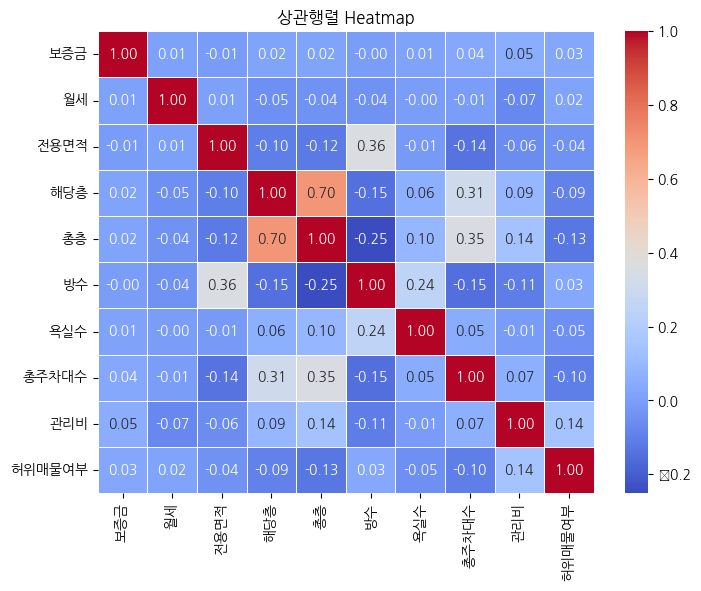

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("상관행렬 Heatmap")
plt.show()

###이상치 확인

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 수치형 변수 목록
numeric_columns = train.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop('허위매물여부')

fig = make_subplots(rows=3, cols=3, subplot_titles=numeric_columns, vertical_spacing = 0.1)

for i, col in enumerate(numeric_columns):
    row = i // 3 + 1
    col_pos = i % 3 + 1
    fig.add_trace(go.Box(y=train[col], boxmean=None, name=col), row=row, col=col_pos)

fig.update_layout(
    title="Boxplots of Numerical Features",
    showlegend=False,
    height= 1500,
    width = 800
)

fig.show()

In [ ]:
import pandas as pd

# 상위 5% 백분위수 값 (95% 백분위수)
upper_5_percent = train[['총주차대수','관리비']].quantile(0.75)

print("상위 1% 백분위수 값:")
print(upper_5_percent)

상위 1% 백분위수 값:
총주차대수    31.0
관리비       9.0
Name: 0.75, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# '총주차대수'와 '관리비' 열만 선택
selected_cols = ['관리비']

# 숫자형 컬럼만 선택하여 Z-Score 계산
z_scores = train[selected_cols].apply(zscore)

# Z-Score가 절대값 3 이상인 데이터 찾기
outliers = train[(z_scores.abs() > 3).any(axis=1)]

# 결과 출력 (이상치가 포함된 행 전체)
outliers

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
518,TRAIN_0518,현장확인,72500000.0,580000,NaN,3.0,5.0,남향,1.0,1.0,가능,5.0,46,Y04yg0T7Z5,B플랫폼,2024-08-23,0
1541,TRAIN_1541,현장확인,33000000.0,230000,21.88,4.0,6.0,북동향,1.0,1.0,가능,8.0,25,A18IU3D9M4,B플랫폼,2024-10-21,0
1574,TRAIN_1574,현장확인,102500000.0,580000,24.01,9.0,10.0,남서향,2.0,1.0,가능,8.0,29,i23ag3Z3Y7,A플랫폼,2024-12-13,0
1819,TRAIN_1819,전화확인,321500000.0,160000,17.50,12.0,14.0,남향,1.0,1.0,가능,104.0,23,z40LO7P9C9,F플랫폼,2024-12-01,0
1976,TRAIN_1976,현장확인,15500000.0,420000,23.14,2.0,4.0,서향,1.0,1.0,불가능,NaN,23,M02bn7Y4P0,A플랫폼,2024-03-23,1
2410,TRAIN_2410,전화확인,14000000.0,490000,21.49,2.0,5.0,동향,1.0,1.0,가능,7.0,26,z40LO7P9C9,F플랫폼,2024-11-27,0


In [ ]:
# 이상치가 포함되지 않은 데이터셋 생성 (이상치 행 삭제)
train = train[~(z_scores.abs() > 3).any(axis=1)]

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

# 상위 1% 백분위수 값 계산
upper_percentile = train[['총주차대수', '관리비']].quantile(0.99)

train['총주차대수'] = winsorize(train['총주차대수'], limits=(0, 0.01))  # 상위 1%만 윈저화
train['관리비'] = winsorize(train['관리비'], limits=(0, 0.01))  # 상위 1%만 윈저화

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd
isol = train.copy()
numeric_columns = isol.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop(['허위매물여부', '방수', '욕실수','보증금','총층','해당층'])
model = IsolationForest(contamination=0.005)  # contamination은 이상치 비율
isol['outlier'] = model.fit_predict(train[numeric_columns])  # 전체 데이터프레임을 입력으로 사용

# 이상치는 -1, 정상 데이터는 1로 표시됨
isol_no_outliers = isol[isol['outlier'] == -1]
isol_no_outliers

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,outlier
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,-1
182,TRAIN_0182,전화확인,170000000.0,610000,20.47,NaN,6.0,북향,1.0,1.0,불가능,6.0,20,M92wE9E7E5,A플랫폼,2023-08-18,1,-1
441,TRAIN_0441,전화확인,161500000.0,570000,41.65,NaN,9.0,동향,2.0,1.0,가능,50.0,22,r82ax9M3U3,B플랫폼,2024-12-02,0,-1
518,TRAIN_0518,현장확인,72500000.0,580000,NaN,3.0,5.0,남향,1.0,1.0,가능,5.0,46,Y04yg0T7Z5,B플랫폼,2024-08-23,0,-1
646,TRAIN_0646,현장확인,351000000.0,10000,18.87,6.0,16.0,동향,1.0,1.0,가능,54.0,22,z40LO7P9C9,F플랫폼,2024-03-26,1,-1
704,TRAIN_0704,현장확인,135000000.0,720000,43.48,4.0,13.0,북향,2.0,1.0,가능,NaN,22,C41wx1K6U9,B플랫폼,2024-09-02,0,-1
932,TRAIN_0932,현장확인,371500000.0,30000,17.50,12.0,14.0,동향,1.0,1.0,가능,104.0,14,Z18up3D1C3,A플랫폼,2024-10-27,0,-1
957,TRAIN_0957,현장확인,112500000.0,100000,17.50,NaN,14.0,남향,1.0,1.0,가능,104.0,19,t93Nt6I2I0,B플랫폼,2024-11-29,0,-1
1541,TRAIN_1541,현장확인,33000000.0,230000,21.88,4.0,6.0,북동향,1.0,1.0,가능,8.0,25,A18IU3D9M4,B플랫폼,2024-10-21,0,-1
1574,TRAIN_1574,현장확인,102500000.0,580000,24.01,9.0,10.0,남서향,2.0,1.0,가능,8.0,29,i23ag3Z3Y7,A플랫폼,2024-12-13,0,-1


###밀도 함수 그리기

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

# 수치형 변수 목록
numeric_columns = train.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop('허위매물여부')

# 서브플롯 설정 (3x3)
fig = make_subplots(rows=3, cols=3, subplot_titles=numeric_columns, vertical_spacing=0.1)

for i, col in enumerate(numeric_columns):
    row = i // 3 + 1
    col_pos = i % 3 + 1

    # 데이터 가져오기
    data = train[col].dropna()

    # 히스토그램 추가 (확률 밀도 정규화)
    fig.add_trace(go.Histogram(x=data, histnorm='probability density', opacity=0.6, name=col),
                  row=row, col=col_pos)

    # KDE(커널 밀도 추정) 추가
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 100)
    kde_values = kde(x_range)

    fig.add_trace(go.Scatter(x=x_range, y=kde_values, mode='lines', name=f"{col} KDE", line=dict()),
                  row=row, col=col_pos)

# 레이아웃 업데이트
fig.update_layout(
    title="Density Plots of Numerical Features",
    showlegend=False,
    height=1500,
    width=800
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

# 수치형 변수 목록
numeric_columns = train.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop('허위매물여부')

# 서브플롯 설정 (총 2개 행: 허위매물여부=0 위, 허위매물여부=1 아래)
fig = make_subplots(rows=2, cols=len(numeric_columns),
                    subplot_titles=[f"{col} (허위매물 0)" for col in numeric_columns] +
                                  [f"{col} (허위매물 1)" for col in numeric_columns],
                    vertical_spacing=0.15)

# 색상 설정
colors = {0: "blue", 1: "red"}
opacity_value = 0.5  # 히스토그램 투명도 설정

for j, value in enumerate([0, 1]):  # 허위매물여부 0과 1을 분리하여 그리기
    row = j + 1  # 첫 번째 행은 0, 두 번째 행은 1

    for i, col in enumerate(numeric_columns):
        data = train[train['허위매물여부'] == value][col].dropna()

        if len(data) > 1:  # KDE 계산을 위해 최소 2개 이상의 데이터 필요
            # 히스토그램 추가 (확률 밀도 정규화)
            fig.add_trace(go.Histogram(
                x=data,
                histnorm='probability density',
                opacity=opacity_value,
                name=f"{col} - 허위매물여부 {value}",
                marker=dict(color=colors[value])
            ), row=row, col=i+1)

            # KDE(커널 밀도 추정) 추가
            kde = gaussian_kde(data)
            x_range = np.linspace(data.min(), data.max(), 100)
            kde_values = kde(x_range)

            fig.add_trace(go.Scatter(
                x=x_range,
                y=kde_values,
                mode='lines',
                name=f"{col} - 허위매물여부 {value} (KDE)",
                line=dict(color=colors[value])
            ), row=row, col=i+1)

# 레이아웃 업데이트
fig.update_layout(
    title="Density & Histogram Plots for 허위매물여부 (Separate Plots)",
    showlegend=False,
    height=800,
    width=300 * len(numeric_columns)
)

fig.show()


## 범주형 변수 확인

In [ ]:
train.select_dtypes(include=['object'])

,ID,매물확인방식,방향,주차가능여부,중개사무소,제공플랫폼,게재일
0,TRAIN_0000,현장확인,서향,가능,t93Nt6I2I0,B플랫폼,2024-10-09
1,TRAIN_0001,현장확인,남동향,불가능,q39iV5J4E6,D플랫폼,2024-12-26
2,TRAIN_0002,전화확인,동향,불가능,b03oE4G3F6,A플랫폼,2024-11-28
3,TRAIN_0003,현장확인,남동향,가능,G52Iz8V2B9,A플랫폼,2024-11-26
4,TRAIN_0004,현장확인,동향,불가능,N45gM0M7R0,B플랫폼,2024-06-25
...,...,...,...,...,...,...,...
2447,TRAIN_2447,서류확인,남향,불가능,d22DX4Y4P8,B플랫폼,2024-11-16
2448,TRAIN_2448,서류확인,남향,불가능,g99sy3I3R8,A플랫폼,2024-10-06
2449,TRAIN_2449,전화확인,남서향,가능,G52Iz8V2B9,B플랫폼,2024-05-15
2450,TRAIN_2450,현장확인,남동향,가능,m69GM9O9B3,B플랫폼,2024-08-06


In [ ]:
train.value_counts('매물확인방식')

,count
매물확인방식,
현장확인,1705
전화확인,382
서류확인,365


In [ ]:
train.value_counts('방향')

,count
방향,
남향,610
동향,605
서향,389
남동향,275
남서향,220
북향,198
북서향,80
북동향,75


In [ ]:
import pandas as pd
import plotly.express as px

# 방향별로 허위매물여부 여부 비율 계산
direction_ratio = train.groupby(['방향', '허위매물여부']).size().reset_index(name='비율')
direction_ratio['비율'] = direction_ratio.groupby('방향')['비율'].transform(lambda x: x / x.sum())

fig = px.bar(direction_ratio, x='방향', y='비율', color='허위매물여부',
             title='방향별 허위매물여부 여부 비율',
             labels={'비율': '비율', '허위매물여부': '허위매물여부 여부', '방향': '방향'},
             color_continuous_scale='Viridis',
             barmode='stack')

fig.update_layout(
    width=800,
    height=400
)
fig.show()

In [ ]:
train.value_counts('주차가능여부')

,count
주차가능여부,
가능,1237
불가능,1215


In [ ]:
duplicates = train['중개사무소'].duplicated()
train[duplicates].value_counts('중개사무소')

,count
중개사무소,
G52Iz8V2B9,798
r82ax9M3U3,42
J52gJ2E4T6,31
H90uE4C0W5,29
b87Td0W4Y3,26
...,...
c25Ms9V8I4,1
O42Rj2E3H5,1
l54dY7J9Q0,1


In [ ]:
train['중개사이력'] = train['중개사무소'].duplicated().astype(int)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 중개사무소별 이력 수 컬럼 추가
train['history_count'] = train.groupby('중개사무소')['중개사무소'].transform('count')
train

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,history_count
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,6
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0,2
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0,19
3,TRAIN_0003,현장확인,163500000.0,30000,36.30,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0,799
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,TRAIN_2447,서류확인,159000000.0,550000,48.95,3.0,3.0,남향,2.0,1.0,불가능,NaN,0,d22DX4Y4P8,B플랫폼,2024-11-16,0,16
2448,TRAIN_2448,서류확인,158500000.0,750000,NaN,2.0,4.0,남향,1.0,1.0,불가능,NaN,2,g99sy3I3R8,A플랫폼,2024-10-06,0,11
2449,TRAIN_2449,전화확인,329000000.0,610000,17.50,8.0,20.0,남서향,1.0,1.0,가능,29.0,10,G52Iz8V2B9,B플랫폼,2024-05-15,0,799
2450,TRAIN_2450,현장확인,31000000.0,400000,22.87,8.0,9.0,남동향,2.0,1.0,가능,NaN,8,m69GM9O9B3,B플랫폼,2024-08-06,0,19


In [ ]:
import pandas as pd
import plotly.express as px


# 산점도 시각화
fig = px.scatter(train,
                 x='history_count',
                 y='허위매물여부',
                 color='허위매물여부',
                 title='허위매물 여부와 중개사무소 이력 수 관계',
                 labels={'history_count': '중개사무소 이력 수', '허위매물여부': '허위매물 여부'},
                 color_discrete_map={0: 'blue', 1: 'red'},
                 category_orders={'허위매물여부': [0, 1]})

# 그래프 출력
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

fig = px.box(train[train['history_count'] != 799],
             x='허위매물여부',
             y='history_count',
             color='허위매물여부',
             title='허위매물 여부에 따른 중개사무소 이력 수 분포',
             labels={'history_count': '중개사무소 이력 수', '허위매물여부': '허위매물 여부'},
             color_discrete_map={0: 'blue', 1: 'red'})

# 그래프 출력
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# ✅ 예제 데이터 생성


# ✅ 중개사무소별 매물 개수 및 허위매물 비율 계산
agency_stats = train.groupby('중개사무소').agg(
    매물개수=('중개사무소', 'count'),  # 중개사무소별 총 매물 개수
    허위매물비율=('허위매물여부', 'mean')  # 허위매물 비율 (평균값)
).reset_index()

# ✅ 허위매물 비율을 %로 변환
agency_stats['허위매물비율'] *= 100

# ✅ 매물 개수가 많은 상위 10개 중개사무소 선택
top_10_agencies = agency_stats.nlargest(20, '매물개수')

# ✅ 막대 그래프 시각화 (매물 개수 + 허위매물 비율)
fig = px.bar(
    top_10_agencies, x='중개사무소', y='매물개수',
    title="매물수가 많은 상위 20개 중개사무소의 매물 개수 및 허위매물 비율",
    labels={"중개사무소": "중개사무소", "매물개수": "매물 개수"},
    text=top_10_agencies['매물개수'],
    opacity=0.7
)

# ✅ 보조축을 활용해 허위매물 비율 추가
fig.add_scatter(
    x=top_10_agencies['중개사무소'], y=top_10_agencies['허위매물비율'],
    mode='lines+markers', name="허위매물 비율 (%)",
    yaxis="y2"
)

# ✅ 보조축 설정
fig.update_layout(
    yaxis2=dict(title="허위매물 비율 (%)", overlaying="y", side="right"),
    yaxis=dict(title="매물 개수"),
    showlegend=True
)

fig.show()


In [ ]:
import pandas as pd


train_agencies = set(train['중개사무소'])

# test 데이터에 있는 중개사무소
test_agencies = set(test['중개사무소'])

# test 데이터에 있지만 train 데이터에는 없는 중개사무소
missing_in_train = test_agencies - train_agencies

print("test 데이터에 있지만 train 데이터에는 없는 중개사무소:", missing_in_train)

test 데이터에 있지만 train 데이터에는 없는 중개사무소: {'r76Io6O6N5', 'R16MK5P2T0', 'B43cJ4B6S1', 'J81AB8H5V4', 'T69QE0X2X6', 'f72YJ6U7Z0', 't49KT6M8D2', 'd46UP7J5U3', 'j43qO5F5T3', 'I22ql8X7F0', 'J08ah6O4N8', 'c95GN2U4B3', 'a30ba3N7V8', 'r34js8G2B3', 'p84lk8P2N5', 'q86eY3M3L6'}


In [ ]:
import plotly.graph_objects as go
import pandas as pd

train = train.sort_values(['history_count']).reset_index(drop=True)

# 이동평균 계산 (허위매물 여부에 대해)
train["rolling_mean"] = train["허위매물여부"].rolling(50, center=True).mean()

# 단일 그래프 생성
fig = go.Figure()

# 이동평균 선 그래프 추가
fig.add_trace(go.Scatter(x=train['history_count'],
                         y=train["rolling_mean"],
                         mode='lines',
                         name='허위매물 여부 이동평균'))

# 레이아웃 설정
fig.update_layout(
    title='중개사무소 이력 수에 따른 허위매물 여부의 이동평균',
    xaxis_title='중개사무소 이력 수',
    yaxis_title='허위매물 여부의 이동평균',
    showlegend=True
)

# 그래프 출력
fig.show()

In [ ]:
train.value_counts('제공플랫폼') #N플랫폼 부재

,count
제공플랫폼,
A플랫폼,958
B플랫폼,610
C플랫폼,350
D플랫폼,184
E플랫폼,142
F플랫폼,63
G플랫폼,59
H플랫폼,34
I플랫폼,20


In [ ]:
test.value_counts('제공플랫폼') #J, M 플랫폼 부재

,count
제공플랫폼,
A플랫폼,244
B플랫폼,164
C플랫폼,78
D플랫폼,45
E플랫폼,37
F플랫폼,21
G플랫폼,10
I플랫폼,5
H플랫폼,3


In [ ]:
# 제공플랫폼별로 허위매물여부 여부 비율 계산
direction_ratio = train.groupby(['제공플랫폼', '허위매물여부']).size().reset_index(name='비율')
direction_ratio['비율'] = direction_ratio.groupby('제공플랫폼')['비율'].transform(lambda x: x / x.sum())

fig = px.bar(direction_ratio, x='제공플랫폼', y='비율', color='허위매물여부',
             title='제공플랫폼별 허위매물여부 여부 비율',
             labels={'비율': '비율', '허위매물여부': '허위매물여부 여부', '제공플랫폼': '제공플랫폼'},
             color_continuous_scale='Viridis',
             barmode='stack')

fig.update_layout(
    width=1000,
    height=500
)
fig.show()

In [ ]:
train['욕실수'].value_counts()

,count
욕실수,
1.0,2350
2.0,84


In [ ]:
train['방수'].value_counts()

,count
방수,
1.0,1515
2.0,921


## 데이터 전처리

### 간단한 모델링에 필요한 간단한 전처리를 수행하는 코드입니다

중개 사무소 희소성 문제 해결

방법론1 : 타겟인코딩

방법론2 : 클러스터링

In [ ]:
import pandas as pd

def smoothed_target_encoding(train_df, test_df, category_col, target_col, alpha=10):
    """
    스무딩 타겟 인코딩 적용
    - train_df: 학습 데이터 (허위매물여부 컬럼 포함)
    - test_df: 테스트 데이터 (허위매물여부 컬럼 없음)
    - category_col: 중개사무소 컬럼명
    - target_col: 허위매물여부 컬럼명
    - alpha: 스무딩 강도 (클수록 전체 평균에 가깝게 조정됨)
    """
    # 전체 허위매물 평균 비율 (global mean)
    global_mean = train_df[target_col].mean()

    # 중개사무소별 허위매물 비율 및 개수 계산
    encoding_stats = train_df.groupby(category_col)[target_col].agg(['sum', 'count'])

    # 스무딩된 타겟 인코딩 값 계산
    encoding_stats['smoothed'] = (encoding_stats['sum'] + global_mean * alpha) / (encoding_stats['count'] + alpha)

    # 중개사무소 → 스무딩된 허위매물 비율 매핑
    encoding_map = encoding_stats['smoothed'].to_dict()

    # train 데이터 변환
    train_df[f'{category_col}_encoded'] = train_df[category_col].map(encoding_map)

    # test 데이터 변환 (새로운 중개사무소는 global_mean으로 대체)
    test_df[f'{category_col}_encoded'] = test_df[category_col].map(encoding_map).fillna(global_mean)

    return train_df, test_df


# 타겟 인코딩 적용
train_encoded, test_encoded = smoothed_target_encoding(train, test, '중개사무소', '허위매물여부')

In [ ]:
missing_counts = train.isna().sum()
missing_cols = missing_counts[missing_counts > 0].index
missing_cols

Index(['전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수'], dtype='object')

In [ ]:
for col in missing_cols:
    train_encoded[f'결측여부_{col}'] = train_encoded[col].isna().astype(int)
for col in missing_cols:
    test_encoded[f'결측여부_{col}'] = test_encoded[col].isna().astype(int)

In [ ]:
#train_encoded = train_encoded.dropna()
X_train_encoded = train_encoded.drop(columns = ['허위매물여부'])
y_train = train_encoded['허위매물여부']
df = pd.concat([X_train_encoded, test_encoded])

열별 결측치 여부 컬럼 추가

년, 월 컬럼 변환

In [ ]:
df['게재일'] = pd.to_datetime(df['게재일'], errors='coerce')
ㄴ
df['년'] = df['게재일'].dt.year
df['월'] = df['게재일'].dt.month

###인코딩

In [ ]:
import pandas as pd

df = pd.get_dummies(df, columns=['매물확인방식', '주차가능여부','년'], drop_first=True)

# 변환할 컬럼만 int로 변경
cols_to_convert = [col for col in df.columns if col.startswith(('매물확인방식_', '주차가능여부_','년_'))]
df[cols_to_convert] = df[cols_to_convert].astype(int)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩할 컬럼 리스트
label_cols = ['제공플랫폼', '방향', '중개사무소']

# 각 컬럼에 대해 라벨 인코딩 적용
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
df.columns

Index(['ID', '보증금', '월세', '전용면적', '해당층', '총층', '방향', '방수', '욕실수', '총주차대수',
       '관리비', '중개사무소', '제공플랫폼', '게재일', '중개사무소_encoded', '결측여부_전용면적',
       '결측여부_해당층', '결측여부_총층', '결측여부_방수', '결측여부_욕실수', '결측여부_총주차대수', '월',
       '매물확인방식_전화확인', '매물확인방식_현장확인', '주차가능여부_불가능', '년_2024', '년_2025'],
      dtype='object')

In [ ]:
df.drop(columns=['게재일', 'ID','중개사무소'],inplace=True)

###결측값 대치

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.impute import KNNImputer

# KNN을 사용하여 결측치(이상치) 대체
imputer = KNNImputer(n_neighbors=5)  # 가까운 5개의 값을 참고하여 대체
df.iloc[:] = imputer.fit_transform(df.iloc[:])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(df)

# 다시 DataFrame으로 변환
df_imputed = pd.DataFrame(data_imputed, columns=df.columns)

In [ ]:
!git clone https://github.com/jsyoon0823/GAIN.git

Cloning into 'GAIN'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 74 (delta 23), reused 70 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 327.87 KiB | 1.63 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
import os
os.chdir('GAIN')  # GAIN 폴더로 이동

In [ ]:
from GAIN.gain import gain

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# GAIN 모델 설정
gain_parameters = {'batch_size': 128, 'hint_rate': 0.9, 'alpha': 100, 'iterations': 10000}

# GAIN을 이용해 결측치 대체
imputed_combined_data = gain(df, gain_parameters)

# 훈련 데이터와 테스트 데이터 다시 분리
imputed_train_data = imputed_combined_data[:len(train)]
imputed_test_data = imputed_combined_data[len(test):]

# 대체된 데이터 확인
print(imputed_train_data)
print(imputed_test_data)

TypeError: gain() got an unexpected keyword argument 'batch_size'

In [ ]:
import numpy as np
from gain import GAIN  # GAIN 패키지 사용 가능

gain_parameters = {'batch_size': 128, 'hint_rate': 0.9, 'alpha': 100, 'iterations': 5000}

# GAIN을 이용한 결측치 대체
imputed_data = GAIN(data, gain_parameters)

# 대체된 데이터 출력
print(imputed_data)

###표준화

In [ ]:
X_train = df_imputed.iloc[:len(train)]
X_test = df_imputed.iloc[len(train):]

In [ ]:
X_train.select_dtypes(include=['float']).columns

Index(['보증금', '월세', '전용면적', '해당층', '총층', '방향', '방수', '욕실수', '총주차대수', '관리비',
       '제공플랫폼', '중개사무소_encoded', '결측여부_전용면적', '결측여부_해당층', '결측여부_총층', '결측여부_방수',
       '결측여부_욕실수', '결측여부_총주차대수', '월', '매물확인방식_전화확인', '매물확인방식_현장확인',
       '주차가능여부_불가능', '년_2024', '년_2025'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaler 초기화
scaler = StandardScaler()

# 복사본 생성
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# 표준화할 열 목록
columns_to_scale = ['전용면적', '보증금', '월세', '관리비', '총주차대수', '해당층', '총층']

# X_train에 대해 표준화 수행
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# X_test에 대해 표준화 수행 (훈련 데이터의 스케일러 사용)
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# XGBoost 모델을 사용한 10-fold 교차 검증
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
xgb_predictions = cross_val_predict(xgb_model, X_train_scaled, y_train, cv=10)

# XGBoost에 대한 classification report
print("XGBoost Classification Report:")
print(classification_report(y_train, xgb_predictions))
xgb_accuracy = accuracy_score(y_train, xgb_predictions)
xgb_f1score = f1_score(y_train, xgb_predictions, average='weighted')

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost F1-score:", xgb_f1score)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2154
           1       0.92      0.82      0.87       298

    accuracy                           0.97      2452
   macro avg       0.95      0.90      0.92      2452
weighted avg       0.97      0.97      0.97      2452

XGBoost Accuracy: 0.9694127243066885
XGBoost F1-score: 0.9685818263707545


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# LightGBM 모델을 사용한 10-fold 교차 검증
lgb_model = lgb.LGBMClassifier(n_estimators=100, max_depth=5, random_state=42, verbose = -1)
lgb_predictions = cross_val_predict(lgb_model, X_train_scaled, y_train, cv=10)

# LightGBM에 대한 classification report
print("\nLightGBM Classification Report:")
print(classification_report(y_train, lgb_predictions))

lgb_accuracy = accuracy_score(y_train, lgb_predictions)
lgb_f1score = f1_score(y_train, lgb_predictions, average='weighted')

print("\nLightGBM Accuracy:", lgb_accuracy)
print("LightGBM F1-score:", lgb_f1score)


LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2154
           1       0.90      0.80      0.85       298

    accuracy                           0.97      2452
   macro avg       0.94      0.89      0.91      2452
weighted avg       0.96      0.97      0.96      2452


LightGBM Accuracy: 0.9653344208809136
LightGBM F1-score: 0.9644502297038283


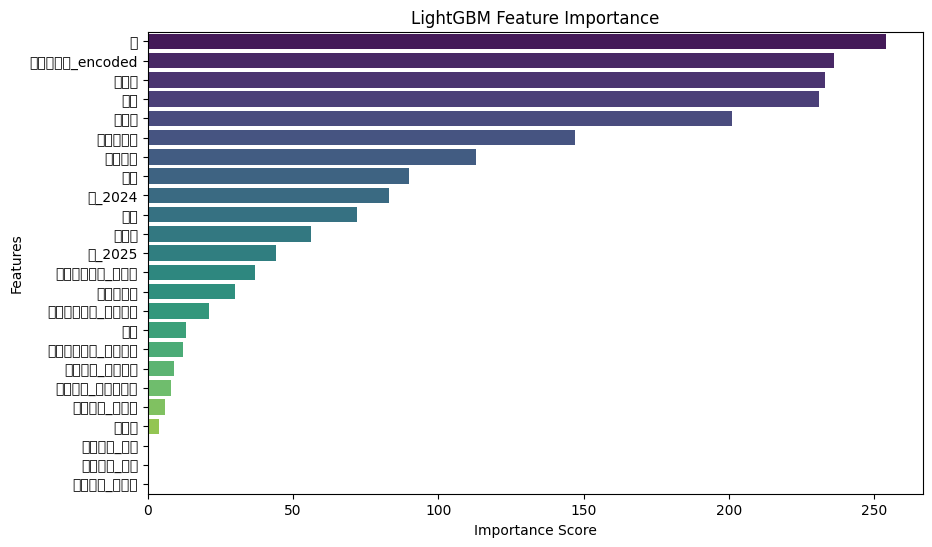

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, f1_score

# LightGBM 모델 학습
lgb_model = lgb.LGBMClassifier(n_estimators=100, max_depth=5, random_state=42, verbose=-1)
lgb_model.fit(X_train_scaled, y_train)

# Feature Importance 가져오기
feature_importance = lgb_model.feature_importances_
feature_names = X_train_scaled.columns

# 데이터프레임으로 변환 후 정렬
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('LightGBM Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## 학습하기

In [ ]:
lgb_model = lgb.LGBMClassifier(n_estimators=100, max_depth=5, random_state=42, verbose=-1)
lgb_model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대해 예측
lgb_predictions = lgb_model.predict(X_test_scaled)

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42, verbose=-1)
xgb_model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대해 예측
xgb_predictions = xgb_model.predict(X_test_scaled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대해 Random Forest 예측
rf_predictions = rf_model.predict(X_test_scaled)

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf_model = BalancedRandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대해 Random Forest 예측
rf_predictions = rf_model.predict(X_test_scaled)

### 예측하기

### 제출하기

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/colab_data/Dscover 25-1 가이드 프로젝트/sample_submission.csv')

In [ ]:
submit['허위매물여부'] = xgb_predictions
submit.head()

,ID,허위매물여부
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


In [ ]:
submit.to_csv('/content/drive/MyDrive/colab_data/Dscover 25-1 가이드 프로젝트/baseline_submission.csv',index=False)